In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Datasets/train_corpus.xlsx", index_col=0)
correlations = pd.DataFrame(columns=["point biserial correlation","p-value", "mutual info"])
df.columns

Index(['text', 'label', '.', ',', ':', ';', '(', ')', '¿', '?', '¡', '!', '-',
       '"', '\', '@', '#', '$', '€', '*', '+', 'sentences', 'words', 'TTR',
       'avgWordsPerSent', 'wordCharCount', 'avgWordDensity', 'nSentsl16Words',
       'nSentsg26Words', 'Lexical density', 'Lexical diversity', 'countNOUN',
       'countVERB', 'countAUX', 'countADJ', 'countPRON', 'countADV',
       'countCCONJ', 'countSCONJ', 'countADP', 'countPROPN', 'countNUM',
       'Comparatives', 'Superlatives', 'ADJ+VERB', 'CONJ+VERB', 'CONJ+ADJ',
       'CONJ+NOUN', 'CONJ+ADV', 'PRON+VERB', 'NOUN+VERB', 'Subject-Verb',
       'Verb-Subject', 'No explicit subject', 'Verb-Object', 'Object-Verb',
       'obl-Verb', 'NERS', 'Grammar errors', 'G. Polini',
       'F. Huerta readability', 'Crawford score'],
      dtype='object')

In [3]:
for col in df.columns:
    if col not in ("text", "label"):
        correlations.loc[col] = list(pointbiserialr(df["label"], df[col]))+[mutual_info_classif(df[col].to_numpy().reshape((-1, 1)), df["label"], random_state= 42)[0]]

/home/ivan/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5404: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


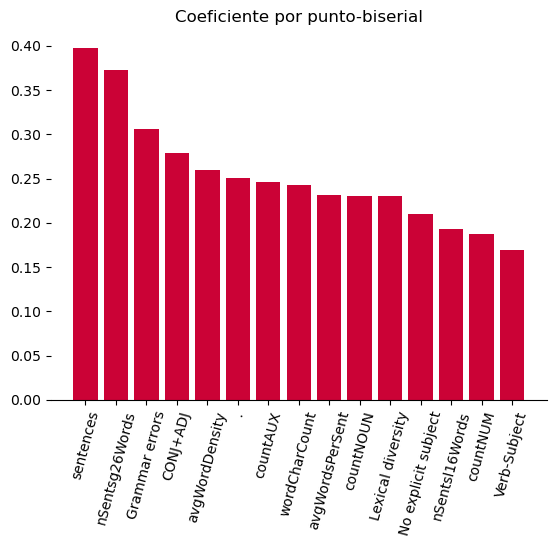

,point biserial correlation,p-value,mutual info
sentences,0.397552,6.035535e-126,0.161795
nSentsg26Words,-0.372616,1.081343e-109,0.124852
Grammar errors,-0.306044,8.042913e-73,0.182878
CONJ+ADJ,0.278303,5.005216e-60,0.134944
avgWordDensity,-0.259975,2.405780e-52,0.203271
.,0.251083,7.831792e-49,0.178818
countAUX,0.245638,9.485208e-47,0.100788
wordCharCount,0.242688,1.214046e-45,0.079442
avgWordsPerSent,-0.231778,1.122148e-41,0.164165
countNOUN,-0.230635,2.844020e-41,0.095079


In [4]:
correlations = correlations.sort_values(by="point biserial correlation" ,key=lambda v: abs(v), ascending=False)
n = 15
pb15 = correlations.index[:n]
fig, ax = plt.subplots()
ax.bar(correlations.index[:n], height=abs(correlations["point biserial correlation"]).to_list()[:n], color = '#CB0236')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_title('Coeficiente por punto-biserial')
plt.xticks(correlations.index[:n], rotation=75)
plt.show()
correlations

In [5]:
correlations[:29].index

Index(['sentences', 'nSentsg26Words', 'Grammar errors', 'CONJ+ADJ',
       'avgWordDensity', '.', 'countAUX', 'wordCharCount', 'avgWordsPerSent',
       'countNOUN', 'Lexical diversity', 'No explicit subject',
       'nSentsl16Words', 'countNUM', 'Verb-Subject', 'countADJ', 'Object-Verb',
       'countPROPN', 'words', 'Crawford score', 'Verb-Object', 'TTR', '!', '(',
       ')', 'obl-Verb', 'countSCONJ', 'PRON+VERB', ','],
      dtype='object')

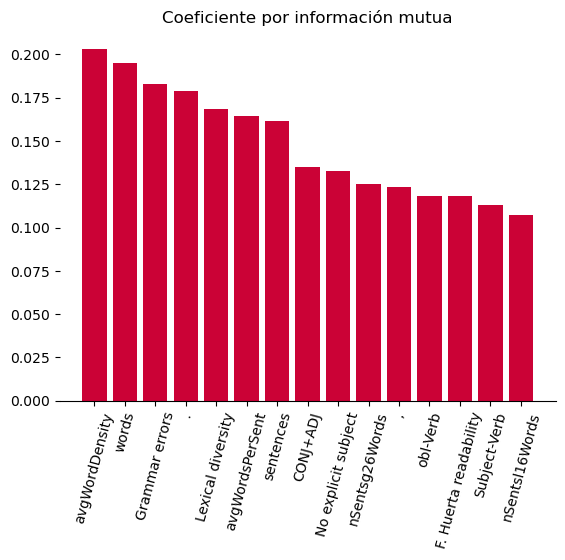

,point biserial correlation,p-value,mutual info
avgWordDensity,-0.259975,2.405780e-52,0.203271
words,0.152083,1.317041e-18,0.195270
Grammar errors,-0.306044,8.042913e-73,0.182878
.,0.251083,7.831792e-49,0.178818
Lexical diversity,-0.229914,5.100594e-41,0.168171
avgWordsPerSent,-0.231778,1.122148e-41,0.164165
sentences,0.397552,6.035535e-126,0.161795
CONJ+ADJ,0.278303,5.005216e-60,0.134944
No explicit subject,-0.210224,1.989856e-34,0.132530
nSentsg26Words,-0.372616,1.081343e-109,0.124852


In [5]:
correlations = correlations.sort_values(by="mutual info" ,key=lambda v: abs(v), ascending=False)
mi15 = correlations.index[:n]
fig, ax = plt.subplots()
ax.bar(correlations.index[:n], height=abs(correlations["mutual info"]).to_list()[:n], color = '#CB0236')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_title('Coeficiente por información mutua')
plt.xticks(correlations.index[:n], rotation=75)
plt.show()
correlations

In [7]:
inter = set(pb15).intersection(set(mi15))
inter, len(inter)

({'.',
  'CONJ+ADJ',
  'Grammar errors',
  'Lexical diversity',
  'No explicit subject',
  'avgWordDensity',
  'avgWordsPerSent',
  'nSentsg26Words',
  'nSentsl16Words',
  'sentences'},
 10)